In [277]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

# Input data files are available in the "../input/" directory.
from subprocess import check_output
input_folder = "../imdb_data"
print(check_output(["ls", input_folder]).decode("utf8"))

imdb-5000-movie-dataset.zip
movie_metadata.csv



In [278]:
# Importing packages

import os
import pandas as pd
from pandas import DataFrame,Series
from sklearn import tree
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import neighbors
from sklearn import linear_model
%matplotlib inline

In [279]:
f = pd.read_csv(input_folder+"/movie_metadata.csv")
data=DataFrame(f)
data.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [286]:
# Briefly explore the categorical data
print("Some directors---------------")
print(data['director_name'].value_counts().head(5))

print("Some main actors-------------")
print(data['actor_1_name'].value_counts().head(5))

Some directors---------------
Steven Spielberg    26
Woody Allen         22
Martin Scorsese     20
Clint Eastwood      20
Ridley Scott        17
Name: director_name, dtype: int64
Some main actors-------------
Robert De Niro    49
Johnny Depp       41
Nicolas Cage      33
J.K. Simmons      31
Matt Damon        30
Name: actor_1_name, dtype: int64


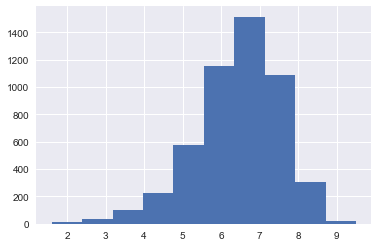

In [288]:
### Explore the most important features

data['imdb_score'].hist(bins=10)

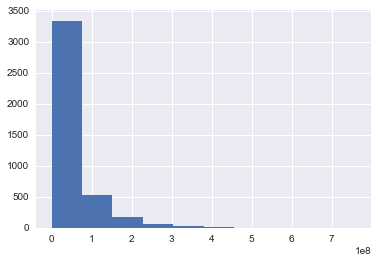

In [289]:
data['gross'].hist()

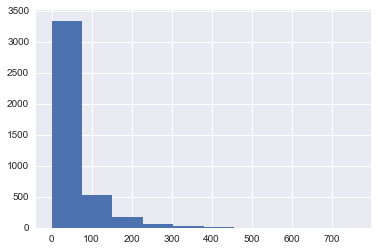

In [305]:
### Add posssibly usefull features

data['gross_millions'] = data['gross']/1E6
data['gross_millions'].hist()

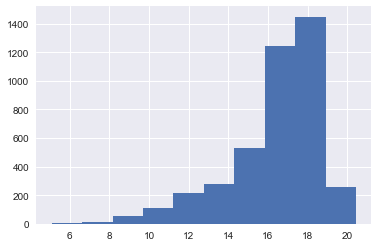

In [306]:
data['gross_log'] = np.log(data['gross'])
data['gross_log'].hist()

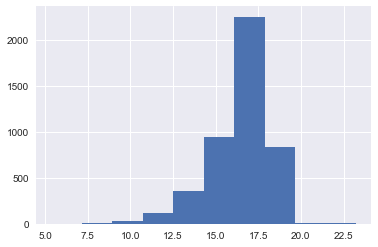

In [319]:
np.log(data['budget']).hist()  ## Consider applying log in the budget too as it has outlayers

In [313]:
### Clean data with NULL values

print( np.sum(data.isnull()) )
print( data.shape )
print( type(data) )

# Gross (the target variable) has the biggest number of null data
# Budget is the second worst variable
# Both are important

data_2 = data.dropna()
print( np.sum(data_2.isnull()) )
print( data_2.shape )
print( type(data_2) )

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
gross_millions               884
gross_log                    884
dtype: int

In [341]:
### Create a filter for numerical features
### Choose predictors

# Create an index for only numerical features
index_filter_num_all=data_2.dtypes[data.dtypes!='object'].index
print("Numerical features:")
print(index_filter_num_all)

# This filter is used in the next steps for choosing the input features
predictors_name = ['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes']  # Remove target variables
print("Predictors:")
print(predictors_name)


# The target feature can be ONE of the following: 
targets_names = ['gross', 'gross_millions', 'gross_log']
print("Targets:")
print(targets_names)

# A list with preditors and targets: 
all_num_names = predictors_name + targets_names
print("All:")
print(all_num_names)



Numerical features:
Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'gross_millions', 'gross_log'],
      dtype='object')
Predictors:
['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']
Targets:
['gross', 'gross_millions', 'gross_log']
All:
['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'num_voted_users', 'cast_total_facebook_likes', 'facenu

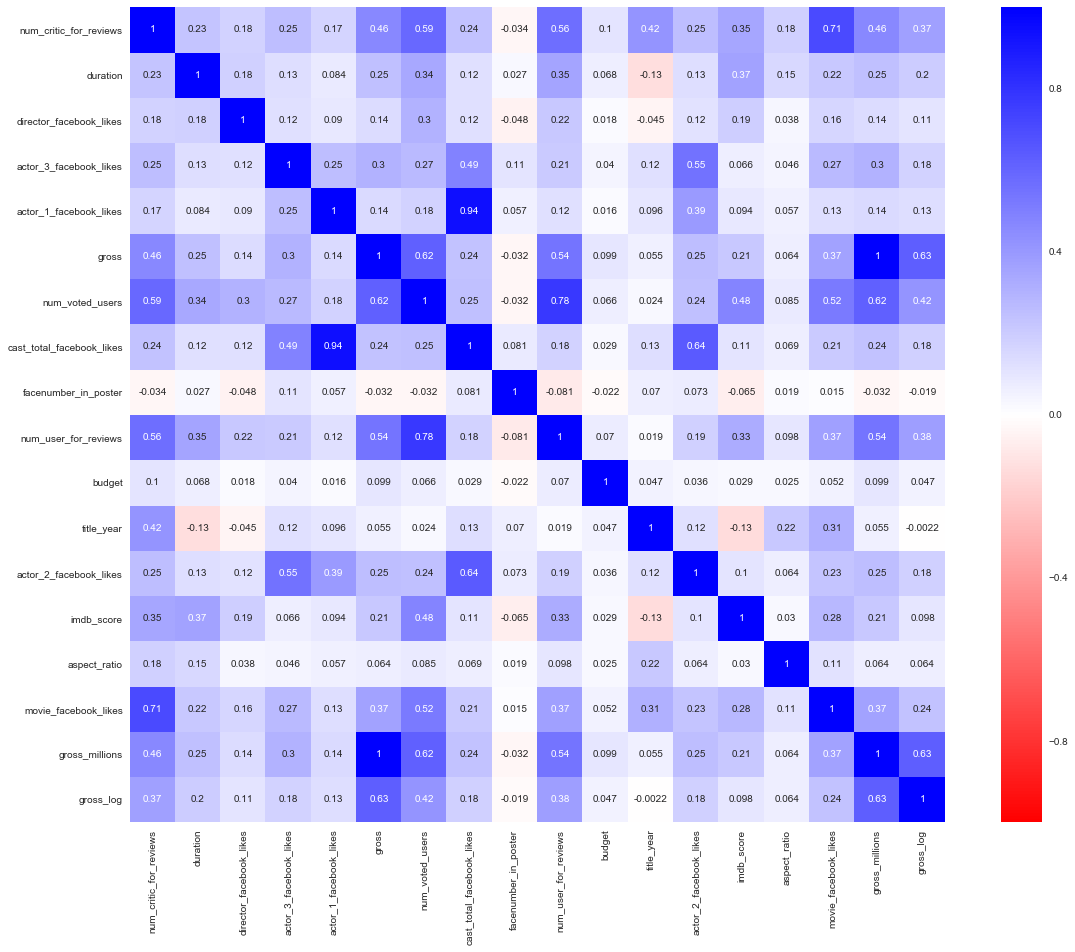

In [339]:
### Correlation matrix

corr_mat=data_2.corr(method='pearson')
plt.figure(figsize=(20,15))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='bwr_r')


In [351]:
### Normalize data
### Set predictors
### Set target

X=StandardScaler().fit_transform(data_2[predictors_name])
y=np.array(data_2['gross'])

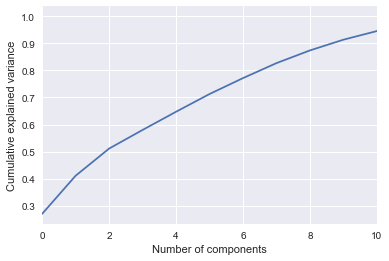

In [352]:
### Principal component analysis (PCA)

from sklearn.decomposition import PCA

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,10,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

(-2, 2)

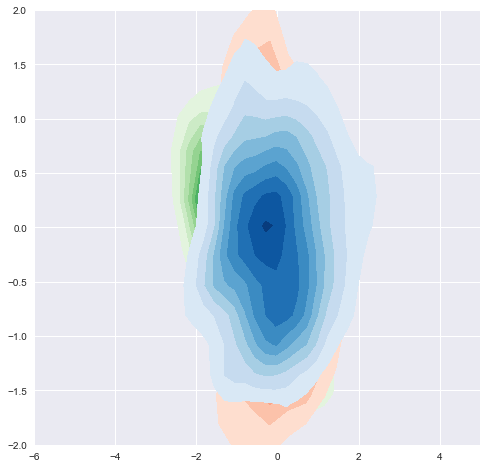

In [353]:
# Since 6 components can explain almost 80% of the variance
# These should be the principal components 

from sklearn.decomposition import PCA
sklearn_pca=PCA(n_components=6)
X_pca=sklearn_pca.fit_transform(X)

sns.set(style='darkgrid')
f, ax = plt.subplots(figsize=(8, 8))
# ax.set_aspect('equal')
ax = sns.kdeplot(X_pca[:,0], X_pca[:,1], cmap="Greens",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(X_pca[:,1], X_pca[:,2], cmap="Reds",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(X_pca[:,2], X_pca[:,3], cmap="Blues",
          shade=True, shade_lowest=False)
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
green = sns.color_palette("Greens")[-2]
#ax.text(0.5, 0.5, "3rd and 4th Projection", size=12, color=blue)
#ax.text(-4, 0.0, "2nd and 3rd Projection", size=12, color=red)
#ax.text(2, 0, "1st and 2nd Projection", size=12, color=green)
plt.xlim(-6,5)
plt.ylim(-2,2)

In [359]:
### Simple data split for training and testing
### 80% train
### 20% test

number_of_samples = len(y)
print("Total: {}".format(number_of_samples))

np.random.seed(0)
random_indices = np.random.permutation(number_of_samples)
num_training_samples = int(number_of_samples*0.80)
X_train = X[random_indices[:num_training_samples]]
y_train = y[random_indices[:num_training_samples]]
X_test  = X[random_indices[num_training_samples:]]
y_test  = y[random_indices[num_training_samples:]]

print("Train: {}".format(len(y_train)))
print("Test:  {}".format(len(y_test)))

Total: 3756
Train: 3004
Test:  752


In [362]:
### Double-check there is not Null data

print(np.sum(np.isnan(X_train.shape)))
print(np.sum(np.isnan(y_train.shape)))
print(np.sum(np.isnan(X_test.shape)))
print(np.sum(np.isnan(y_test.shape)))

0
0
0
0


Metrics
MAE: 32396208.2788914
R2:  0.46948382426770463


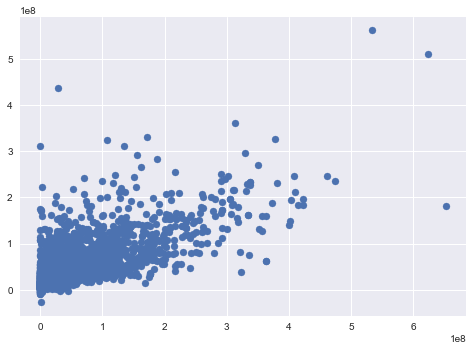

In [379]:
### Ridge Regression

from sklearn import metrics

model=linear_model.Ridge()
model.fit(X_train,y_train)
#model.fit(data_2[predictors_name],data_2['gross'])

y_train_prediction=model.predict(X_train)
#y_train_prediction=model.predict(data_2[predictors_name])

plt.scatter(y_train, y_train_prediction)
#plt.scatter(data_2['gross'], y_train_prediction)


#Some metrics
accuracy = metrics.mean_absolute_error(y_train, y_train_prediction)
r2 = metrics.r2_score(y_train, y_train_prediction)
print("Metrics")
print("MAE: {}".format(accuracy))
print("R2:  {}".format(r2))